# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [39]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)


### Collection 

In [2]:
from Tools.tools import collection

In [4]:
collection()

#### 1. Importer votre DataSet

In [5]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

In [6]:
mydata['Target'].value_counts()

0.0    8
1.0    8
2.0    8
3.0    8
4.0    8
5.0    8
6.0    8
7.0    8
8.0    8
9.0    8
Name: Target, dtype: int64

##### Print

In [7]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,14.642817,-10.735195,3.381839,7.798591,11.493445,-10.521669,-2.693839,0.131401,-3.741180,-5.512195,-9.150021,-7.615519,0.0
1,14.528633,-14.633968,5.641833,-0.696391,6.606046,-4.031434,-0.620022,4.187201,2.132214,-3.284688,-4.458233,-6.681779,1.0
2,13.957434,-12.230372,8.449700,4.223619,9.035483,-5.222797,0.100625,3.270993,-1.159082,-6.141014,-6.398981,-7.394122,2.0
3,15.180570,-13.251829,3.016010,2.456617,7.464452,-11.518233,-1.724816,7.703353,4.456324,-0.186844,-5.697223,-6.189123,3.0
4,14.817479,-16.654662,4.848232,0.671553,6.539856,-4.867714,0.948315,6.872991,2.421056,-1.529675,0.832047,-1.911084,4.0


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     80 non-null     float64
 1   Fe2     80 non-null     float64
 2   Fe3     80 non-null     float64
 3   Fe4     80 non-null     float64
 4   Fe5     80 non-null     float64
 5   Fe6     80 non-null     float64
 6   Fe7     80 non-null     float64
 7   Fe8     80 non-null     float64
 8   Fe9     80 non-null     float64
 9   Fe10    80 non-null     float64
 10  Fe11    80 non-null     float64
 11  Fe12    80 non-null     float64
 12  Target  80 non-null     float64
dtypes: float64(13)
memory usage: 8.2 KB


=> Nous observons un dataset composées de valeurs numériques et sans valeurs nulles

In [9]:
var_quant = mydata.select_dtypes(exclude='object').columns
var_quant

Index(['Fe1', 'Fe2', 'Fe3', 'Fe4', 'Fe5', 'Fe6', 'Fe7', 'Fe8', 'Fe9', 'Fe10',
       'Fe11', 'Fe12', 'Target'],
      dtype='object')

#### 3. Visualiser les targets

(array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

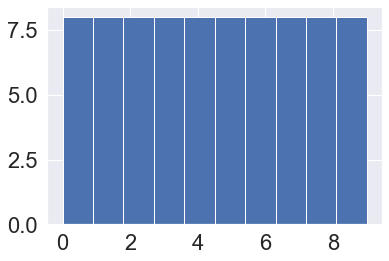

In [10]:
plt.hist(mydata['Target'])

In [11]:
mydata['Target'].value_counts()

0.0    8
1.0    8
2.0    8
3.0    8
4.0    8
5.0    8
6.0    8
7.0    8
8.0    8
9.0    8
Name: Target, dtype: int64

=> On obeserve que les données sont équilibrées (noraml, comme nous avons enregisté le même nombre de fois les targets) 

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [12]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(80, 12)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [13]:
# Séparation du jeu de donnée
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64, 12), (16, 12), (64,), (16,))

#### 7. Développer votre meilleur modèle de classification

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# pour la réalisation de pipeline pour SVM, arbre de décision, ...
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as xgb

# pour masquer les messages "d'erreur"
import warnings
warnings.filterwarnings('ignore')

In [16]:
model_name = ['SVM', 'KNN', 'DecisionTreeRegressor', 'DecisionTreeClass', 'RandomForest', 'XGBoost']
model_name

['SVM',
 'KNN',
 'DecisionTreeRegressor',
 'DecisionTreeClass',
 'RandomForest',
 'XGBoost']

In [26]:
pipelines = [Pipeline([('scaler', StandardScaler()), ('svc', SVC()),]),
             Pipeline([('scale', StandardScaler()), ('KNN', KNN()),]),
             Pipeline([('scale', StandardScaler()), ('DecisionTreeRegressor', DTR()),]),
             Pipeline([('scale', StandardScaler()), ('DecisionTreeClass', DTC()),]),
             Pipeline([('scale', StandardScaler()), ('RandomForest', RFC()),]),
             Pipeline([('scaler', StandardScaler()), ('XGB', xgb())]),]

parametres = [{'svc__kernel': ['linear', 'rbf'], 'svc__C':[1, 10]},
              {'KNN__n_neighbors' : np.arange(2,12), 
               'KNN__metric' : ['minkowski','euclidean','manhattan'],
               'KNN__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']},
              {'DecisionTreeRegressor__criterion':['mae'],
               'DecisionTreeRegressor__max_depth': np.arange(2,8),
               'DecisionTreeRegressor__max_leaf_nodes': np.arange(1,10),
               'DecisionTreeRegressor__ccp_alpha': [0,0.1,0.2,0.3,0.4]},
              {'DecisionTreeClass__max_depth': np.arange(2,8), 
               'DecisionTreeClass__max_leaf_nodes': np.arange(1,10),
               'DecisionTreeClass__ccp_alpha':[0,0.1,0.2,0.3,0.4],},
              {'RandomForest__n_estimators': np.arange(5, 50, 5), 
               #'RandomForest__min_samples_split':[2, 3, 10]},
               'RandomForest__max_depth': np.arange(2,8),
               'RandomForest__max_leaf_nodes': np.arange(2,10)},
              {'XGB__eta' : [0.1, 0.2, 0.3, 0.4], 
               'XGB__max_depth' : [2, 4, 6, 8, 10], 
               'XGB__eval_metric' : ['mlogloss']},
             ]


cm_list = []
score = []
best_model = []
best_grid = []


for model, p, name in zip(pipelines, parametres, model_name):
    exp = GridSearchCV(model, param_grid = p,
                       cv = 3, scoring='accuracy', return_train_score=False, verbose=1)
    grid_search = exp.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    #best_model = grid_search.best_estimator_

    # Récupérer le modèle avec les meilleurs paramètres
    score.append(grid_search.score(X_test, y_test))
    cm_list.append(confusion_matrix(y_test, y_pred))                
    best_model.append(grid_search.best_estimator_)
    best_grid.append(grid_search.best_params_)        
     

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 120 candidates, totalling 360 fits
Fitting 3 folds for each of 270 candidates, totalling 810 fits
Fitting 3 folds for each of 270 candidates, totalling 810 fits
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [27]:
score

[0.875, 0.9375, 0.5625, 0.625, 0.875, 0.875]

In [28]:
best_grid

[{'svc__C': 1, 'svc__kernel': 'linear'},
 {'KNN__algorithm': 'auto', 'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5},
 {'DecisionTreeRegressor__ccp_alpha': 0,
  'DecisionTreeRegressor__criterion': 'mae',
  'DecisionTreeRegressor__max_depth': 4,
  'DecisionTreeRegressor__max_leaf_nodes': 7},
 {'DecisionTreeClass__ccp_alpha': 0,
  'DecisionTreeClass__max_depth': 7,
  'DecisionTreeClass__max_leaf_nodes': 9},
 {'RandomForest__max_depth': 4,
  'RandomForest__max_leaf_nodes': 8,
  'RandomForest__n_estimators': 30},
 {'XGB__eta': 0.3, 'XGB__eval_metric': 'mlogloss', 'XGB__max_depth': 4}]

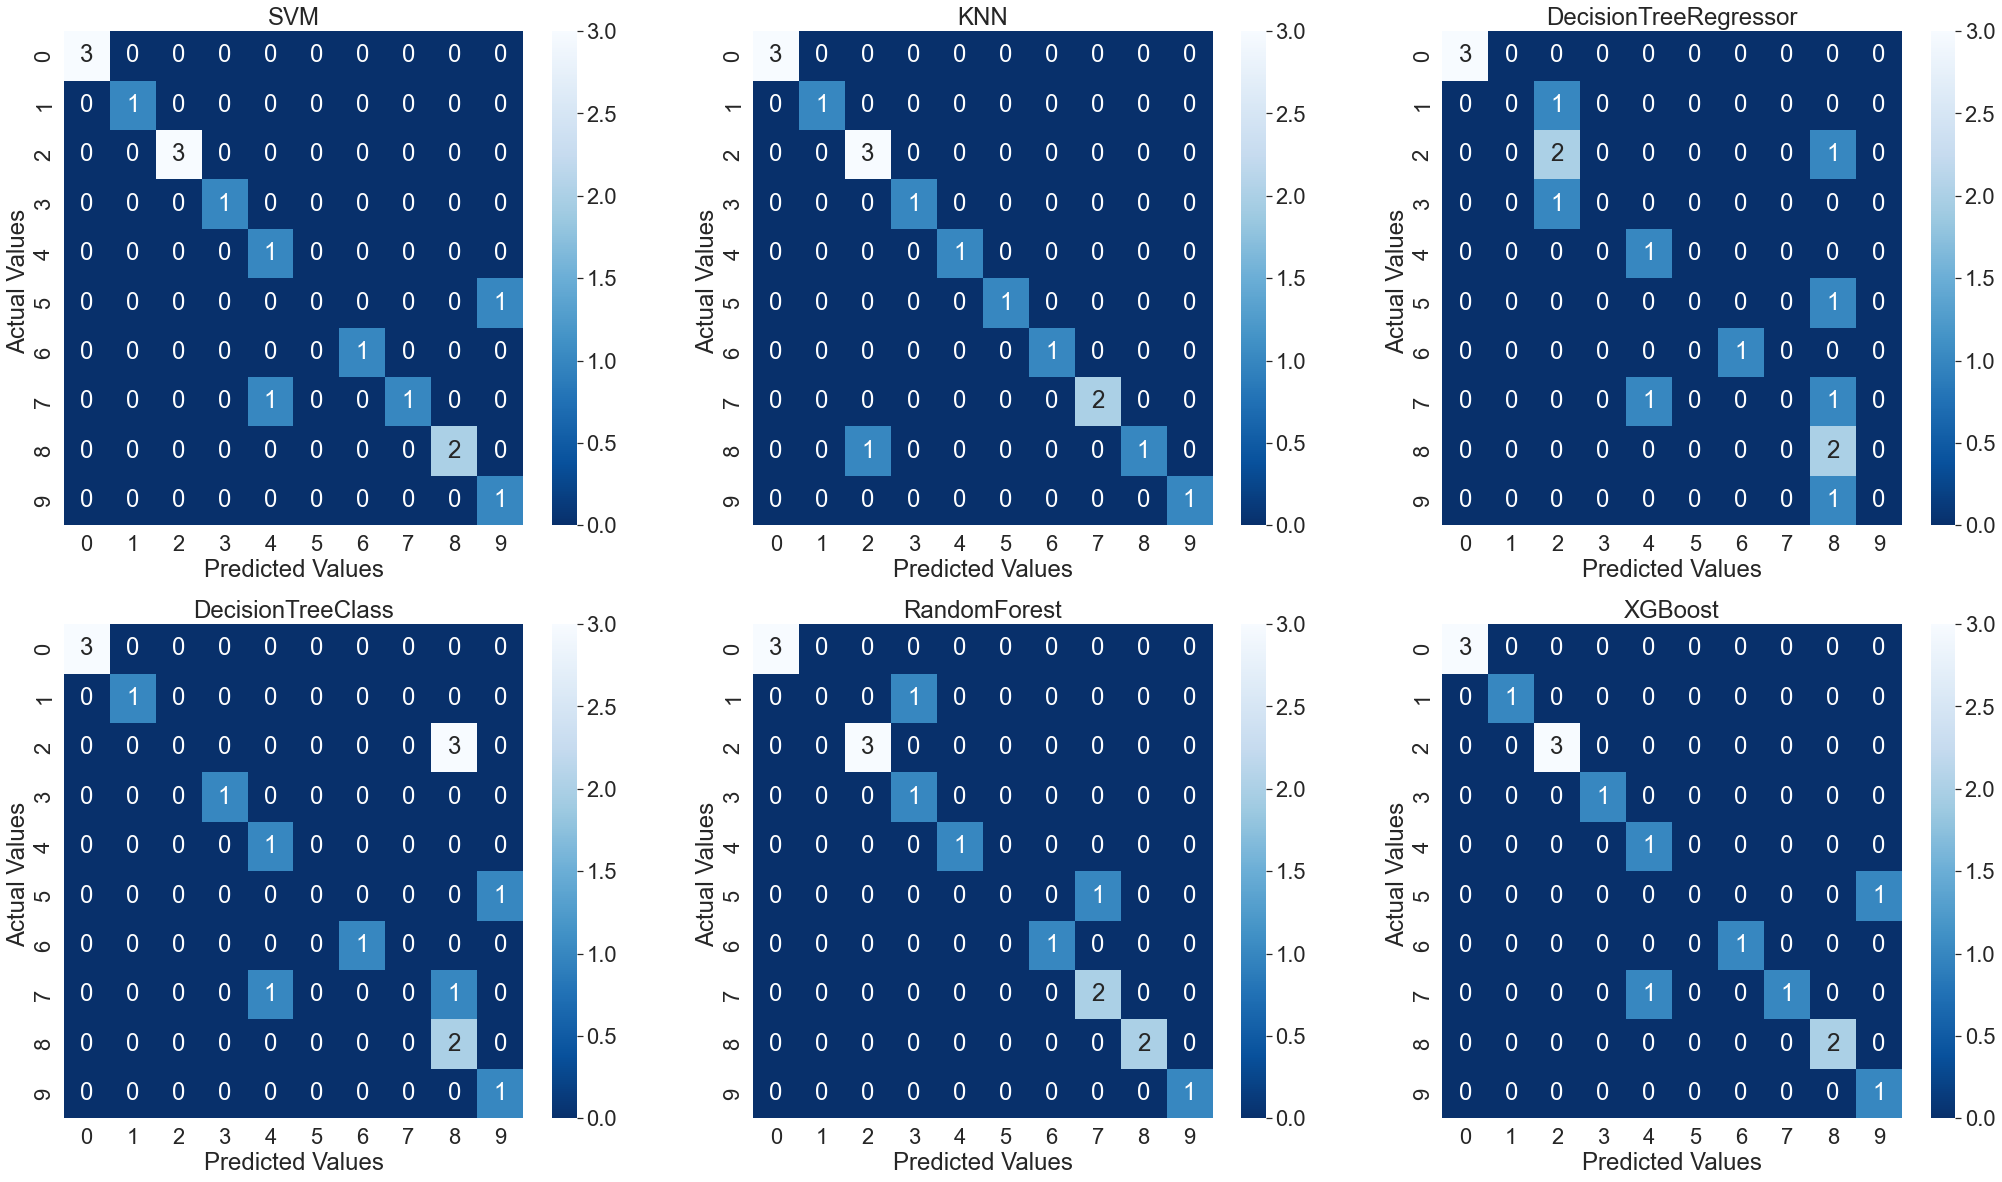

In [29]:
import seaborn as sns
# plot confusion matrix
fig = plt.figure(figsize = (35,20))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_name[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values ')

In [30]:
# accuracy and AUC
result_best_model = pd.DataFrame({'Model':model_name, 'Score':score ,'best_model':best_model, 
                          'best_grid':best_grid}).sort_values(by='Score' , ascending = False)
result_best_model

,Model,Score,best_model,best_grid
1,KNN,0.9375,"(StandardScaler(), KNeighborsClassifier(metric...","{'KNN__algorithm': 'auto', 'KNN__metric': 'man..."
0,SVM,0.8750,"(StandardScaler(), SVC(C=1, kernel='linear'))","{'svc__C': 1, 'svc__kernel': 'linear'}"
4,RandomForest,0.8750,"(StandardScaler(), (DecisionTreeClassifier(max...","{'RandomForest__max_depth': 4, 'RandomForest__..."
5,XGBoost,0.8750,"(StandardScaler(), XGBClassifier(base_score=0....","{'XGB__eta': 0.3, 'XGB__eval_metric': 'mloglos..."
3,DecisionTreeClass,0.6250,"(StandardScaler(), DecisionTreeClassifier(ccp_...","{'DecisionTreeClass__ccp_alpha': 0, 'DecisionT..."
2,DecisionTreeRegressor,0.5625,"(StandardScaler(), DecisionTreeRegressor(ccp_a...","{'DecisionTreeRegressor__ccp_alpha': 0, 'Decis..."


In [32]:
best_grid_final = result_best_model.iloc[0,3]
best_grid_final

{'KNN__algorithm': 'auto', 'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}

In [31]:
best_model_final = result_best_model.iloc[0,2]
best_model_final

Pipeline(steps=[('scale', StandardScaler()),
                ('KNN', KNeighborsClassifier(metric='manhattan'))])

### Enregistrement du meilleur modèle

In [41]:
import joblib

filename = './Tools/model_pred'
joblib.dump(best_model_final, filename)
nom_du_modele = joblib.load(filename)